<a href="https://colab.research.google.com/github/chajmz/Dataquest/blob/master/Scrapping_Examiners_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from pandas.io.json import json_normalize    
from datetime import datetime
from datetime import date
from google.colab import drive

In [61]:
url = 'https://www.patentbots.com/stats/art-unit/3647'
response = requests.get(url)
response

<Response [200]>

In [70]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

def scrapArtUnitExaminers(num):
  url = 'https://www.patentbots.com/stats/art-unit/'+str(num)
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")
  td = soup.findAll('td')
  pattern = r'[0-9]*[-]([\w-]*)\"'
  l2 = []
  for i in range(0,len(td),3):
    line_str = str(td[i].contents[0])
    if 'examiner/' in line_str:
      name = re.search(pattern, line_str).group(1).replace('-',' ')
      num_case = int(td[i+1].contents[0])
      grant = str(td[i+2].contents[0])
      l2.append([name,num_case,grant])
  df = pd.DataFrame(l2,columns=['examiner','num_case','percent_grant'])
  df['art_unit'] = num
  return df

df = scrapArtUnitExaminers(3644)
df

,examiner,num_case,percent_grant,art_unit
0,ABBOTT LEWIS YVONNE RENEE,506,85%,3644
1,ABELL TYE W,0,0%,3644
2,COLLINS TIMOTHY D,11,18%,3644
3,DAVIS RICHARD G,324,71%,3644
4,DIXON KEITH L,232,75%,3644
5,ELLIS CHRISTOPHER P,378,89%,3644
6,FILOSI TERRI L,4,0%,3644
7,KREINER MICHAEL B,205,87%,3644
8,MCFALL NICHOLAS A,223,87%,3644
9,NGUYEN TRINH T,391,65%,3644


In [132]:
import json

def getSmallChartDataUnit(unit):
  url = 'https://www.patentbots.com/stats/art-unit/' + str(unit) 
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")
  comp = soup.findAll('script',attrs = {'id':'comparison-data'})
  for row in comp:
    df = pd.DataFrame(json.loads(row.string),columns=['group','percent_grant_num','3ygr','percent_grant'])
  df['art_unit'] = int(unit)
  return df


def getBigChartDataUnit(unit):
  url = 'https://www.patentbots.com/stats/art-unit/' + str(unit) 
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")
  comp2 = soup.findAll('script',attrs = {'id':'timeline-data'})
  for row in comp2:
    df2 =  pd.DataFrame(json.loads(row.string),columns=['months','comment','granted','pending','abandoned'])
  df2['art_unit'] = int(unit)
  
  sum_all = df2['granted'] + df2['pending'] + df2['abandoned']
  df2['p_grant'] = round(df2['granted']/sum_all,2)
  df2['p_pending'] = round(df2['pending']/sum_all,2)
  df2['p_abandoned'] = round(df2['abandoned']/sum_all,2)
  return df2


abc =  getBigChartDataUnit(3644)
abc

,months,comment,granted,pending,abandoned,art_unit,p_grant,p_pending,p_abandoned
0,0,None,449,6569,20,3644,0.06,0.93,0.00
1,1,None,455,6547,20,3644,0.06,0.93,0.00
2,2,None,623,6291,21,3644,0.09,0.91,0.00
3,3,None,869,5981,26,3644,0.13,0.87,0.00
4,4,None,1446,5358,27,3644,0.21,0.78,0.00
5,5,None,1850,4894,29,3644,0.27,0.72,0.00
6,6,None,2066,4386,271,3644,0.31,0.65,0.04
7,7,None,2308,3752,602,3644,0.35,0.56,0.09
8,8,None,2702,3216,681,3644,0.41,0.49,0.10
9,9,None,3092,2734,718,3644,0.47,0.42,0.11


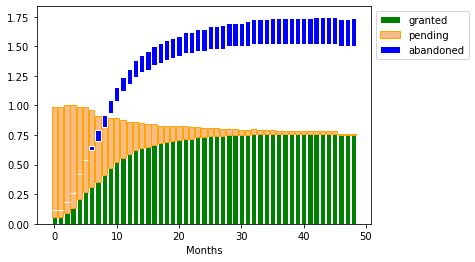

In [135]:
import numpy as np
import matplotlib.pyplot as plt
barWidth = 0.85
# Create green Bars
plt.bar(abc['months'], abc['p_grant'], color='green', edgecolor='white', width=barWidth,label='granted')
# Create orange Bars
plt.bar(abc['months'], abc['p_pending'],bottom = abc['p_grant'], color='orange', edgecolor='orange', width=barWidth,label='pending')
plt.bar(abc['months'], abc['p_abandoned'],bottom=[i+j for i,j in zip(abc['p_grant'], abc['p_grant'])], color='blue', edgecolor='white', width=barWidth,label='abandoned')
 
# Custom x axis
plt.xlabel("Months")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()

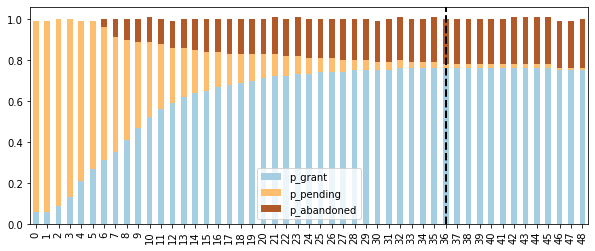

In [159]:
from matplotlib import cm

def getGraphUnit(df):
  cmap = cm.get_cmap('Paired')
  ax = df[['p_grant','p_pending','p_abandoned']].plot(kind="bar", stacked=True,legend=True,figsize=(10,4),colormap=cmap)
  ax.axvline(x=36,linewidth=2, color='black', ls='--')


getGraphUnit(abc)

In [99]:

comp2 = soup.findAll('script',attrs = {'id':'timeline-data'})
for row in comp2:
 # print('row ',row.string)
  #ll = ast.literal_eval(row.string)
  df2 =  pd.DataFrame(json.loads(row.string),columns=['months','comment','granted','pending','abandoned'])
  print(ll)
  #df = pd.DataFrame(ast.literal_eval(row.string))

df2

[[0, None, 449, 6569, 20], [1, None, 455, 6547, 20], [2, None, 623, 6291, 21], [3, None, 869, 5981, 26], [4, None, 1446, 5358, 27], [5, None, 1850, 4894, 29], [6, None, 2066, 4386, 271], [7, None, 2308, 3752, 602], [8, None, 2702, 3216, 681], [9, None, 3092, 2734, 718], [10, None, 3348, 2374, 745], [11, None, 3592, 2019, 786], [12, None, 3764, 1735, 847], [13, None, 3910, 1493, 893], [14, None, 3986, 1308, 931], [15, None, 4024, 1169, 956], [16, None, 4077, 1034, 975], [17, None, 4104, 918, 994], [18, None, 4118, 835, 1002], [19, None, 4116, 750, 1004], [20, None, 4110, 683, 1011], [21, None, 4113, 614, 1022], [22, None, 4118, 550, 1030], [23, None, 4095, 478, 1039], [24, None, 4081, 431, 1051], [25, None, 4060, 397, 1059], [26, None, 4020, 361, 1059], [27, None, 3993, 331, 1064], [28, None, 3966, 292, 1063], [29, None, 3939, 254, 1061], [30, None, 3904, 231, 1064], [31, None, 3845, 209, 1055], [32, None, 3799, 186, 1046], [33, None, 3763, 159, 1055], [34, None, 3720, 142, 1046], [35, 

,months,comment,granted,pending,abandoned
0,0,None,449,6569,20
1,1,None,455,6547,20
2,2,None,623,6291,21
3,3,None,869,5981,26
4,4,None,1446,5358,27
5,5,None,1850,4894,29
6,6,None,2066,4386,271
7,7,None,2308,3752,602
8,8,None,2702,3216,681
9,9,None,3092,2734,718


In [0]:
td = soup.findAll('td')
l = []
i = 0
temp_list = []
for row in td:
  ref = soup.findAll('a')
  

<td><a href="/stats/examiner/3647-ARK-DARREN-W">Examiner Ark</a></td>
<td>436</td>
<td>55%</td>
<td><a href="/stats/examiner/3647-BADAWI-MEDHAT">Examiner Badawi</a></td>
<td>424</td>
<td>85%</td>
<td><a href="/stats/examiner/3647-BONNETTE-RODNEY-ANDREW">Examiner Bonnette</a></td>
<td>23</td>
<td>100%</td>
<td><a href="/stats/examiner/3647-BURGESS-MARC-R">Examiner Burgess</a></td>
<td>312</td>
<td>42%</td>
<td><a href="/stats/examiner/3647-CHANG-SUKWOO-JAMES">Examiner Chang</a></td>
<td>0</td>
<td>0%</td>
<td><a href="/stats/examiner/3647-DINH-TIEN-QUANG">Examiner Dinh</a> (SPE)</td>
<td>74</td>
<td>65%</td>
<td><a href="/stats/examiner/3647-EVANS-EBONY-E">Examiner Evans</a></td>
<td>356</td>
<td>60%</td>
<td><a href="/stats/examiner/3647-FABULA-MICHAEL-A">Examiner Fabula</a></td>
<td>196</td>
<td>63%</td>
<td><a href="/stats/examiner/3647-FRAZIER-BRADY-W">Examiner Frazier</a></td>
<td>7</td>
<td>0%</td>
<td><a href="/stats/examiner/3647-GREEN-RICHARD-R">Examiner Green</a></td>
<td>286<